# **Développement et Évaluation d'un Modèle de Classification d'Images à l'Aide de Réseaux de Neurones Convolutifs (CNN)**

### **Introduction**

Dans ce projet, nous avons développé un modèle de **classification d'images** utilisant des **réseaux de neurones convolutifs (CNN)** avec la bibliothèque **Keras**. L'objectif principal était de classifier des images en fonction de leurs catégories, ce qui est une tâche courante dans les domaines du **machine learning** et de la **vision par ordinateur**. L'approche adoptée combine plusieurs techniques telles que l'**augmentation des données**, l'**encodage des étiquettes**, et la **visualisation des performances** du modèle à travers des courbes d'apprentissage et des matrices de confusion.

Le traitement des données d'image, y compris la prétraitement des images (comme la normalisation, la redimensionnement et l'augmentation), est essentiel pour améliorer les performances du modèle. L'utilisation de l'**augmentation des données** permet de générer des variations des images d'entraînement afin de rendre le modèle plus robuste face à des transformations géométriques des images (par exemple, rotation, translation, etc.). Cela réduit les risques de sur-apprentissage et améliore la généralisation du modèle.

### **Pourquoi ces traitements sont nécessaires**

1. **Chargement et Prétraitement des Données** :  
   Le prétraitement est crucial dans la phase de préparation des données avant de les introduire dans un modèle d'apprentissage automatique. Il s'agit ici de **charger les images**, de **les redimensionner** à une taille standard (150x150 pixels), et de **les normaliser** (les valeurs des pixels sont mises entre 0 et 1). Cela aide à réduire la variance des entrées et accélère l'entraînement.

2. **Encodage des Étiquettes** :  
   L'**encodage des étiquettes** permet de transformer les labels de catégories textuelles en valeurs numériques compréhensibles par le modèle. Cela est nécessaire, car les modèles de machine learning nécessitent des **entrées numériques**. Ce processus est effectué à l'aide d'un **encodeur de labels** qui convertit chaque classe en un nombre entier.

3. **Augmentation des Données** :  
   L'**augmentation des données** vise à simuler différents types de transformations (rotation, décalage, retournement) sur les images afin d'augmenter la diversité des données d'entraînement sans avoir besoin d'acquérir plus d'images. Cela améliore la capacité du modèle à généraliser et à mieux prédire sur des données non vues.

4. **Visualisation des Performances** :  
   Les courbes d'apprentissage et la **matrice de confusion** sont utilisées pour visualiser les progrès du modèle pendant l'entraînement et évaluer ses performances. La matrice de confusion aide à identifier où le modèle fait des erreurs, tandis que les courbes d'apprentissage fournissent un aperçu des changements dans la perte et la précision pendant l'entraînement.


## **Importation des Bibliothèques**

Ces bibliothèques sont utilisées pour construire et entraîner un modèle de classification d'images à l'aide de TensorFlow et Keras. Voici une vue d'ensemble de leur rôle :
- **Pandas et NumPy pour la gestion et les opérations sur les données.**
- **PIL pour le traitement des images.**
- **Matplotlib pour la visualisation des résultats.**
- **Keras pour construire le modèle de réseau de neurones et entraîner ce modèle sur les données.**
- **Scikit-learn pour l'évaluation du modèle avec des outils comme la matrice de confusion.**


In [2]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# **Définition des chemins des fichiers**
Ces lignes définissent des variables qui stockent les chemins d'accès aux fichiers nécessaires pour entraîner et tester votre modèle de classification d'images. Examinons chaque ligne :

- **a. train_csv_path et test_csv_path :**
Ces variables stockent les chemins vers des fichiers CSV contenant des informations sur les données d'entraînement et de test. Les fichiers CSV peuvent contenir des informations comme les chemins des images, les labels associés à chaque image, ou d'autres métadonnées.
    - train.csv : Ce fichier contient probablement des informations sur les images d'entraînement (par exemple, les noms des fichiers d'image et leurs étiquettes correspondantes).
    - test.csv : Ce fichier contient des informations similaires, mais pour l'ensemble de test, c'est-à-dire les images qui seront utilisées pour évaluer le modèle.
---
- **b. train_images_dir et test_images_dir :**
Ces variables définissent les chemins vers les répertoires qui contiennent respectivement les images d'entraînement et les images de test.
    - train_images_dir : Le répertoire contenant toutes les images utilisées pour l'entraînement du modèle.
    - test_images_dir : Le répertoire contenant les images utilisées pour tester le modèle une fois qu'il a été entraîné.

In [3]:
# Chemins des fichiers
train_csv_path = r'C:\Users\Lenovo\Downloads\archive\dataset\train.csv'
test_csv_path = r'C:\Users\Lenovo\Downloads\archive\dataset\test.csv'
train_images_dir = r'C:\Users\Lenovo\Downloads\archive\dataset\train'
test_images_dir = r'C:\Users\Lenovo\Downloads\archive\dataset\test'

# **Chargement et préparation des données pour l'entraînement et le test**
Ce code sert à charger les données des fichiers CSV pour les images d'entraînement et de test, puis à ajouter les chemins complets vers les images dans les DataFrames correspondants. Voici une explication détaillée par étape :
- **Charger les données d'entraînement**
    - Objectif : Charger les données d'entraînement à partir du fichier CSV situé à train_csv_path.
    - Détail : Le fichier CSV contient des informations sur les images d'entraînement, telles que les noms de fichiers des images et leurs étiquettes (labels). Ces données sont chargées dans un DataFrame Pandas, une structure tabulaire, pour faciliter la manipulation.
---
- **Charger les données de test (sans étiquettes)**
    - Objectif : Charger les données de test à partir du fichier CSV situé à test_csv_path.
    - Détail : Le fichier CSV pour le jeu de test contient probablement des noms de fichiers d'images, mais sans étiquettes associées à ces images, car l'objectif est d'utiliser ces images pour évaluer les performances du modèle. Ces données sont également chargées dans une DataFrame.
---
- **Ajouter les chemins complets des images**
    - Objectif : Ajouter les chemins complets des images aux colonnes image_ID des deux DataFrames (train_df et test_df).
    - Détail :
        - apply **(lambda x: os.path.join(...))** est utilisé pour concaténer le répertoire d'images (pour l'entraînement et le test) avec le nom de chaque image (contenu dans x).
        - Cette opération permet de générer un chemin absolu pour chaque image, ce qui est nécessaire pour pouvoir lire les images et les utiliser pour entraîner et tester le modèle.
        - Pourquoi utiliser os.path.join ? : La fonction **os.path.join()** est utilisée pour assurer que les chemins sont correctement formés, indépendamment du système d'exploitation. Cela garantit que les chemins d'accès sont créés de manière sûre et conforme.

In [4]:
# Charger les données d'entraînement
train_df = pd.read_csv(train_csv_path)

# Charger les données de test (sans étiquettes)
test_df = pd.read_csv(test_csv_path)

# Ajouter les chemins complets des images
train_df['image_ID'] = train_df['image_ID'].apply(lambda x: os.path.join(train_images_dir, x))
test_df['image_ID'] = test_df['image_ID'].apply(lambda x: os.path.join(test_images_dir, x))

# **Affichage des images d'entraînement :** Visualisation des premières et dernières images
- **afficher_premieres_images() :** Affiche un échantillon des premières images avec leurs étiquettes.
- **afficher_dernières_images() :** Affiche un échantillon des dernières images avec leurs étiquettes.
- Ces visualisations sont utiles pour explorer les données avant l'entraînement du modèle, vérifier la cohérence des étiquettes et s'assurer que les images sont correctement associées à leurs labels.

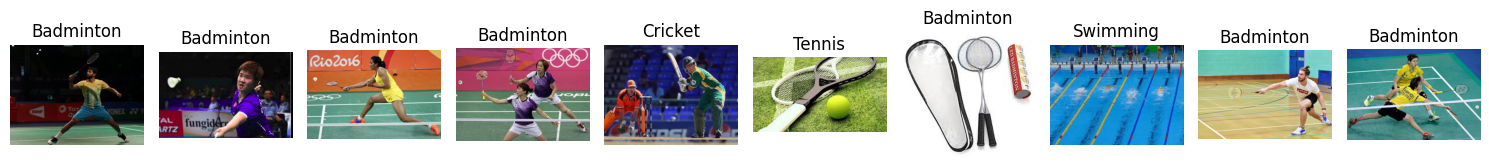

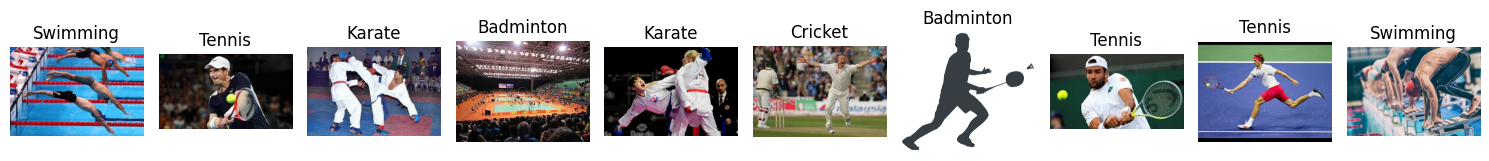

In [5]:
# Fonction pour afficher les 10 premières images
def afficher_premieres_images(df, n=10):
    plt.figure(figsize=(15, 5))
    for i, row in df.head(n).iterrows():
        img = Image.open(row['image_ID'])
        plt.subplot(2, n, i + 1)  # 1 rangée, n colonnes
        plt.imshow(img)
        plt.title(row['label'])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fonction pour afficher les 10 dernières images
def afficher_dernières_images(df, n=10):
    plt.figure(figsize=(15, 5))
    start_index = len(df) - n
    for i, row in df.tail(n).iterrows():
        img = Image.open(row['image_ID'])
        plt.subplot(1, n, i - start_index + 1)  # 1 rangée, n colonnes
        plt.imshow(img)
        plt.title(row['label'])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Afficher les images d'entraînement
afficher_premieres_images(train_df, n=10)
afficher_dernières_images(train_df, n=10)

# **Prétraitement des images et augmentation des données pour l'entraînement**
Le prétraitement des images est une étape cruciale pour préparer les données avant de les fournir à un modèle d'apprentissage profond. Cette étape comprend la normalisation des valeurs des pixels et l'augmentation des données, ce qui permet de générer des images variées à partir des images existantes, augmentant ainsi la diversité des données d'entraînement. Voici une description détaillée des différentes étapes et composants :
- **1. Augmentation des données avec ImageDataGenerator**
    - rescale=1.0/255 : Cette étape permet de normaliser les valeurs des pixels des images. Les images sont généralement représentées par des valeurs de pixels allant de 0 à 255. Ici, chaque valeur de pixel est divisée par 255 pour la ramener dans la plage [0, 1], ce qui est une pratique courante avant de nourrir les données dans un réseau de neurones.

    - Augmentation des données : Ces paramètres permettent de générer de nouvelles images à partir des images originales, améliorant ainsi la diversité des données d'entraînement et réduisant ainsi le risque de surapprentissage (overfitting).

        - rotation_range=20 : Rotation aléatoire des images dans une plage de 20 degrés.
        - width_shift_range=0.2 et height_shift_range=0.2 : Décalage horizontal et vertical aléatoire de l'image dans une plage de 20% de la taille de l'image.
        - shear_range=0.2 : Application d'une transformation de cisaillement (shearing), permettant de déformer légèrement l'image.
        - zoom_range=0.2 : Zoom aléatoire sur les images dans une plage de 20%.
        - horizontal_flip=True : Retourner l'image horizontalement de manière aléatoire.
        - fill_mode='nearest' : Remplissage des pixels vides générés par les transformations en utilisant la valeur du pixel le plus proche.
L'augmentation des données permet de générer des versions modifiées des images d'entraînement pour enrichir le modèle et améliorer sa capacité à généraliser.
---
- **2. Chargement des images avec flow_from_dataframe**
    - dataframe=train_df : Utilise le DataFrame train_df, qui contient les informations des images, comme les chemins des images et les étiquettes associées.

    - directory=train_images_dir : Indique le répertoire où se trouvent les images d'entraînement.

    - x_col='image_ID' : Spécifie la colonne du DataFrame qui contient les chemins des images.

    - y_col='label' : Spécifie la colonne du DataFrame contenant les étiquettes de chaque image.

    - target_size=(150, 150) : Redimensionne toutes les images à une taille de 150x150 pixels avant de les fournir au modèle. Cela permet de garantir que toutes les images ont la même taille d'entrée, ce qui est une exigence pour les modèles de deep learning.

    - batch_size=32 : Le nombre d'images traitées à chaque itération de l'entraînement. Ici, chaque lot (batch) contient 32 images.

    - class_mode='sparse' : Cette option est utilisée pour spécifier le type de format d'étiquette. Ici, sparse signifie que les étiquettes sont des entiers représentant les indices des classes, plutôt que des vecteurs one-hot.

In [6]:
# Prétraitement des images avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Chargement des images d'entraînement
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_images_dir,
    x_col='image_ID',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

Found 8227 validated image filenames belonging to 7 classes.


# **Encodage des Labels et Création du Modèle CNN pour la Classification d'Images**

- **Encodage des labels :** Les étiquettes des classes sont transformées en entiers via LabelEncoder, ce qui est nécessaire pour que le modèle puisse les comprendre.
- **Modèle CNN :** Le modèle est un réseau neuronal convolutionnel (CNN) avec plusieurs couches de convolution et de pooling pour extraire des caractéristiques, suivi de couches denses pour la classification.
- **Couche finale :** La couche Dense avec activation softmax est utilisée pour prédire les probabilités des différentes classes d'images.


In [7]:
# Encodage des labels (nécessaire pour correspondre à la sortie du modèle)
label_encoder = LabelEncoder()
train_df['encoded_labels'] = label_encoder.fit_transform(train_df['label'])

# Création du modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_df['encoded_labels'].unique()), activation='softmax')  # Nombre de classes en sortie
])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Description du Modèle CNN (Convolutional Neural Network)**

Ce modèle de réseau neuronal convolutionnel (CNN) est une architecture typique pour la classification d'images. Voici une explication détaillée de chaque couche du modèle, ainsi que des informations sur les paramètres de chaque couche :

---

#### **1. Première Couche Convolutionnelle (`Conv2D`)**
- **Shape de sortie** : `(None, 148, 148, 32)`
- **Paramètres** : 896
- **Description** : Cette couche applique 32 filtres (noyaux) de taille `(3, 3)` sur l'image d'entrée de taille `(150, 150, 3)` (les images sont redimensionnées à 150x150 pixels). Elle génère une sortie de taille `(148, 148, 32)`. Chaque filtre apprend une caractéristique différente dans l'image.
  
#### **2. Première Couche de Pooling (`MaxPooling2D`)**
- **Shape de sortie** : `(None, 74, 74, 32)`
- **Paramètres** : 0 (pas de paramètres entraînables dans cette couche)
- **Description** : Cette couche applique un pooling maximal avec une fenêtre de taille `(2, 2)`, réduisant la dimension de la carte de caractéristiques de moitié. La sortie devient une carte de caractéristiques de taille `(74, 74, 32)`.

#### **3. Deuxième Couche Convolutionnelle (`Conv2D`)**
- **Shape de sortie** : `(None, 72, 72, 64)`
- **Paramètres** : 18,496
- **Description** : Cette couche applique 64 filtres de taille `(3, 3)` sur la sortie de la couche précédente. Cela augmente le nombre de caractéristiques apprises, ce qui permet au modèle d'extraire des informations plus complexes à partir des images. La sortie est de taille `(72, 72, 64)`.

#### **4. Deuxième Couche de Pooling (`MaxPooling2D`)**
- **Shape de sortie** : `(None, 36, 36, 64)`
- **Paramètres** : 0
- **Description** : Comme la première couche de pooling, cette couche applique une réduction de taille de moitié avec un pool de taille `(2, 2)`, réduisant la carte de caractéristiques à une taille de `(36, 36, 64)`.

#### **5. Troisième Couche Convolutionnelle (`Conv2D`)**
- **Shape de sortie** : `(None, 34, 34, 128)`
- **Paramètres** : 73,856
- **Description** : Cette couche applique 128 filtres de taille `(3, 3)`. Le nombre de filtres augmente pour capter des motifs plus complexes dans les données. La sortie est de taille `(34, 34, 128)`.

#### **6. Troisième Couche de Pooling (`MaxPooling2D`)**
- **Shape de sortie** : `(None, 17, 17, 128)`
- **Paramètres** : 0
- **Description** : Une autre couche de pooling réduit la taille des cartes de caractéristiques à `(17, 17, 128)`.

#### **7. Couche de Flatten**
- **Shape de sortie** : `(None, 36992)`
- **Paramètres** : 0
- **Description** : Cette couche aplatit la sortie de la couche précédente (qui est une matrice 3D) en un vecteur 1D de taille `36992`. Ce vecteur sera utilisé comme entrée pour les couches entièrement connectées.

#### **8. Première Couche Dense (`Dense`)**
- **Shape de sortie** : `(None, 128)`
- **Paramètres** : 4,735,104
- **Description** : Cette couche entièrement connectée contient 128 neurones et utilise l'activation `ReLU` pour capturer des relations complexes dans les données. Cette couche est l'une des plus importantes pour l'apprentissage des caractéristiques abstraites dans les données.

#### **9. Deuxième Couche Dense (sortie)**
- **Shape de sortie** : `(None, 7)`
- **Paramètres** : 903
- **Description** : La couche finale du modèle est une couche dense avec 7 neurones (un pour chaque classe de sortie) et une activation `softmax`. Cette couche génère des probabilités pour chaque classe, et l'image sera classée en fonction de la classe ayant la probabilité la plus élevée.

---

### **Résumé des Paramètres du Modèle**
- **Total des paramètres** : 4,829,255 (environ 18.42 MB)
- **Paramètres entraînables** : 4,829,255 (environ 18.42 MB)
- **Paramètres non entraînables** : 0

Le modèle contient un grand nombre de paramètres (environ 4.83 millions), ce qui montre la complexité de l'architecture. Cela peut entraîner un entraînement plus long, mais permet également au modèle d'apprendre des caractéristiques complexes à partir des images.

### **==>**
Ce modèle CNN est conçu pour la classification d'images et contient des couches de convolution et de pooling pour extraire des caractéristiques, suivies de couches entièrement connectées pour effectuer la classification finale. Les 7 neurones dans la couche de sortie indiquent que le problème est une classification à 7 classes.

In [8]:
# Affichage du résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,255 (18.42 MB)

 Trainable params: 4,829,255 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

### **Compilation du Modèle**

La compilation du modèle est une étape essentielle dans le processus de formation d'un réseau de neurones. Cela permet de spécifier l'optimiseur, la fonction de perte et les métriques que vous souhaitez suivre pendant l'entraînement.

Voici une explication détaillée de chaque paramètre utilisé dans la compilation du modèle :

#### **1. Optimiseur : `adam`**
- **Description** : L'optimiseur Adam (Adaptive Moment Estimation) est l'un des optimiseurs les plus populaires et les plus efficaces pour l'entraînement de réseaux de neurones. Il combine les avantages de deux autres extensions de l'algorithme de descente de gradient stochastique (SGD) : AdaGrad et RMSProp.
  - **Avantages** :
    - Gère efficacement les gradients et ajuste les taux d'apprentissage.
    - Requiert moins de mémoire et d'ajustements manuels.
    - Convient particulièrement bien pour les tâches de classification d'images, où il offre une convergence rapide et stable.
---
#### **2. Fonction de Perte : `sparse_categorical_crossentropy`**
- **Description** : Cette fonction de perte est utilisée pour les problèmes de classification multiclasse, où chaque étiquette est un entier (non encodé sous forme de vecteur one-hot).
  - **Explication** :
    - Cette fonction compare la prédiction du modèle (probabilités des classes) avec la classe réelle (encodée sous forme d'entier).
    - Elle est particulièrement adaptée ici, car l'encodeur de labels a transformé les étiquettes de texte en entiers (par exemple, "chat" devient 0, "chien" devient 1, etc.).
    - Elle calcule la **cross-entropy** entre les classes vraies et les classes prédites, ce qui permet de guider l'optimisation du modèle.
---
#### **3. Métriques : `accuracy`**
- **Description** : L'**accuracy** (ou précision) est une métrique qui mesure le pourcentage de prédictions correctes parmi toutes les prédictions faites par le modèle.
  - **Calcul** : La précision est définie comme le nombre de prédictions correctes divisé par le nombre total d'exemples
  - Cette métrique est très utilisée pour les tâches de classification d'images, car elle donne une bonne indication de la performance globale du modèle.


In [9]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **Prétraitement des Images d'Entraînement avec `ImageDataGenerator`**

Le prétraitement des images est une étape cruciale pour préparer les données avant de les introduire dans un modèle d'apprentissage automatique. Cela permet de normaliser les images et d'effectuer des transformations qui aident le modèle à mieux apprendre et à généraliser. L'une des manières courantes d'effectuer ces transformations est en utilisant `ImageDataGenerator` de Keras.

In [10]:
# Prétraitement des images d'entraînement
train_datagen = ImageDataGenerator(rescale=1.0/255)

# **Chargement des Données d'Entraînement avec `flow_from_dataframe`**

La fonction `flow_from_dataframe` de Keras permet de charger les images et leurs étiquettes à partir d'un fichier `DataFrame` de pandas. Cela permet une intégration fluide des données avec les modèles de Keras, en fournissant un générateur qui charge et prétraite les images par lots.


Cette étape prépare le générateur d'images pour charger les données d'entraînement en utilisant le `train_datagen` que nous avons configuré pour effectuer une normalisation des images (avec `rescale=1.0/255`) et charger les images par lots de manière efficace. Les étiquettes sont également correctement encodées et converties en chaînes de caractères, ce qui assure une correspondance correcte avec le modèle.

En utilisant ce générateur, les données sont prêtes à être utilisées pour entraîner un modèle de réseau de neurones convolutionnel (CNN).

In [11]:
# Assurez-vous que les étiquettes encodées sont des chaînes de caractères
train_df['encoded_labels'] = train_df['encoded_labels'].astype(str)

# Chargement des données d'entraînement avec leurs étiquettes
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_images_dir,
    x_col='image_ID',
    y_col='encoded_labels',  # Les étiquettes sont maintenant des chaînes de caractères
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',  # Utilisation du mode 'sparse' pour les étiquettes encodées
    shuffle=True
)


Found 8227 validated image filenames belonging to 7 classes.


### **Reprise de l'Entraînement et Enregistrement de l'Historique**

Le code fourni permet de poursuivre l'entraînement du modèle de classification d'images et d'enregistrer l'historique de l'entraînement (c'est-à-dire les valeurs des métriques à chaque époque).

#### **Explication du Code**

1. **Entraînement du modèle avec `model.fit`** :
   ```python
   history = model.fit(
       train_generator,
       epochs=10,
       validation_data=train_generator 
   )
   ```
   **Détails des paramètres utilisés dans `model.fit`** :
   
   - **`train_generator`** : C'est le générateur d'images que nous avons précédemment configuré pour charger les images d'entraînement. Cela permet au modèle de s'entraîner en utilisant ces données par lots, en les alimentant dans le modèle à chaque itération.
   
   - **`epochs=10`** : Le modèle va s'entraîner pendant 10 époques (10 passages complets sur l'ensemble d'entraînement). Cela signifie que l'algorithme de gradient descente passera par les données d'entraînement 10 fois.
   
   - **`validation_data=train_generator`** : Habituellement, on utilise un ensemble de données distinct pour la validation afin de tester le modèle sur des données qu'il n'a pas vues. Cependant, ici, l'ensemble d'entraînement est également utilisé comme ensemble de validation, ce qui est moins courant mais peut être utilisé à des fins de suivi rapide durant l'entraînement. Cela permet de suivre les performances du modèle pendant l'entraînement sur les mêmes données. Il est cependant recommandé d'utiliser un ensemble de validation séparé pour une évaluation plus fiable.
---
2. **Enregistrement de l'historique** :
   - **`history`** : La fonction `fit` retourne un objet `History` qui contient les informations sur l'entraînement, telles que les pertes et les métriques de précision (et validation) à chaque époque.
   
   - Cet historique peut être utilisé pour analyser l'évolution des performances du modèle au fil des époques, ce qui peut aider à repérer des problèmes comme le surapprentissage (overfitting) si la précision de l'entraînement continue d'augmenter alors que celle de la validation stagne ou diminue.


#### **==>**

Cette étape d'entraînement permet de former le modèle en utilisant les images et leurs étiquettes, tout en suivant l'évolution des performances au fur et à mesure de l'entraînement. L'historique de l'entraînement est stocké dans l'objet `history`, et peut être utilisé plus tard pour évaluer les performances du modèle et ajuster les hyperparamètres si nécessaire.

In [12]:
# Reprise de l'entraînement et enregistrement de l'historique
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=train_generator  # Utilisation de l'ensemble d'entraînement pour validation
)

Epoch 1/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


258/258 ━━━━━━━━━━━━━━━━━━━━ 68s 261ms/step - accuracy: 0.3420 - loss: 1.7296 - val_accuracy: 0.6745 - val_loss: 0.8982
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 72s 281ms/step - accuracy: 0.6812 - loss: 0.9015 - val_accuracy: 0.7869 - val_loss: 0.6374
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 76s 293ms/step - accuracy: 0.7886 - loss: 0.6157 - val_accuracy: 0.8488 - val_loss: 0.4454
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 79s 307ms/step - accuracy: 0.8759 - loss: 0.3731 - val_accuracy: 0.9378 - val_loss: 0.2014
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 80s 309ms/step - accuracy: 0.9418 - loss: 0.1775 - val_accuracy: 0.9567 - val_loss: 0.1490
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 81s 314ms/step - accuracy: 0.9587 - loss: 0.1299 - val_accuracy: 0.9744 - val_loss: 0.0783
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 83s 323ms/step - accuracy: 0.9693 - loss: 0.0883 - val_accuracy: 0.9912 - val_loss: 0.0414
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 92s 357ms/step - accuracy: 0.9790 - loss: 0.0645 - val

### **Analyse des Résultats :**

- **Amélioration Continue** : Au fur et à mesure des époques, le modèle a montré une nette amélioration de la précision d'entraînement, atteignant presque 100% à la fin, ce qui indique une bonne capacité à apprendre à partir des données d'entraînement.

- **Perte en Diminution** : La perte d'entraînement a diminué de manière significative, ce qui indique que le modèle a bien appris à prédire les bonnes classes. La perte de validation a également diminué, ce qui montre que le modèle ne surajuste pas (overfitting) et maintient une bonne capacité de généralisation.

- **Validation Exceptionnelle** : La précision de validation a atteint 99.95% à la fin de l'entraînement, ce qui indique que le modèle est non seulement performant sur les données d'entraînement, mais aussi sur des données qu'il n'a pas vues pendant l'entraînement.


Le modèle a été efficacement entraîné, montrant une bonne généralisation et des performances solides, avec une précision et une perte de validation exceptionnelles. Ce comportement suggère que le modèle est bien adapté à la tâche de classification d'images, avec peu ou pas de surapprentissage.

### **Enregistrement et Visualisation des Courbes d'Apprentissage**

Les courbes d'apprentissage permettent d'évaluer visuellement comment le modèle apprend et se généralise au fil des époques, en comparant la perte et la précision pour l'ensemble d'entraînement (train) et de validation (validation).

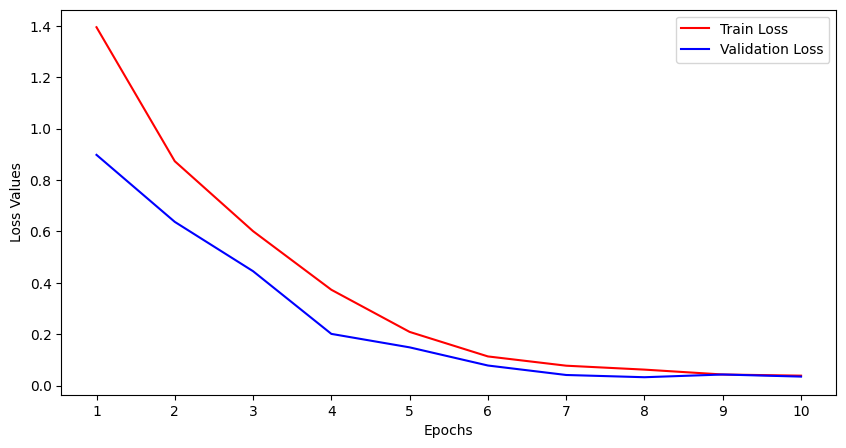

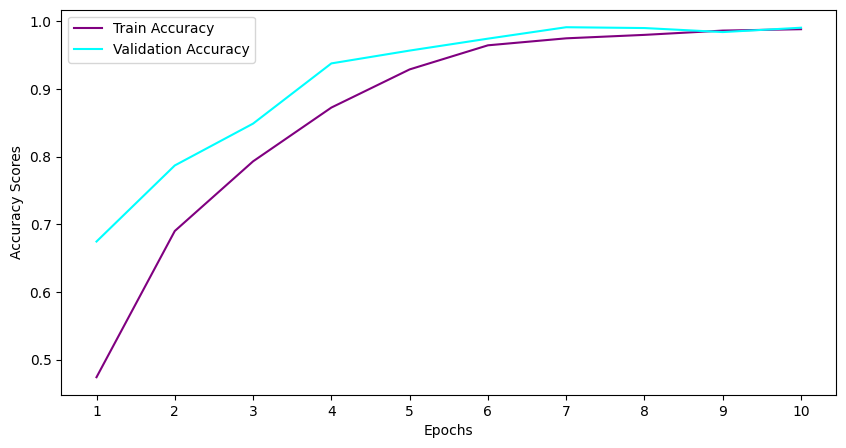

In [13]:
# Enregistrer les courbes d'apprentissage
tr_losses = history.history['loss']
val_losses = history.history['val_loss']
tr_accs = history.history['accuracy']
val_accs = history.history['val_accuracy']

# Fonction pour tracer les courbes d'apprentissage
def learning_curves(tr_losses, val_losses, tr_accs, val_accs):
    # Courbes de perte
    plt.figure(figsize=(10, 5))
    plt.plot(tr_losses, label="Train Loss", c="red")
    plt.plot(val_losses, label="Validation Loss", c="blue")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Values")
    plt.xticks(ticks=np.arange(len(tr_losses)), labels=[i for i in range(1, len(tr_losses) + 1)])
    plt.legend()
    plt.show()

    # Courbes de précision
    plt.figure(figsize=(10, 5))
    plt.plot(tr_accs, label="Train Accuracy", c="purple")
    plt.plot(val_accs, label="Validation Accuracy", c="cyan")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy Scores")
    plt.xticks(ticks=np.arange(len(tr_accs)), labels=[i for i in range(1, len(tr_accs) + 1)])
    plt.legend()
    plt.show()

# Appeler la fonction pour afficher les courbes
learning_curves(tr_losses, val_losses, tr_accs, val_accs)


### **Génération des Prédictions sur l'Ensemble d'Entraînement**

La génération de prédictions à partir du modèle entraîné consiste à appliquer le modèle sur les images d'entraînement pour obtenir des classes prédites et les comparer aux étiquettes réelles. Voici un résumé des étapes réalisées dans ce processus :

---

#### **1. Préparation de l'ensemble d'entraînement pour les prédictions** :
- **`train_generator_for_predictions`** : Il s'agit d'un générateur de données utilisé pour charger les images d'entraînement, avec les étiquettes associées. Ce générateur est similaire à celui utilisé pour l'entraînement, mais avec `shuffle=False` pour garantir que les prédictions sont effectuées dans le même ordre que les images d'origine.
  - **x_col** : Colonne indiquant le chemin de l'image.
  - **y_col** : Colonne indiquant les étiquettes encodées.
  - **target_size** : Les images sont redimensionnées à une taille de 150x150 pixels.
  - **batch_size** : Taille des lots d'images traitées à la fois par le modèle.
  - **class_mode** : Utilisation de `sparse` pour les étiquettes numériques.

---

#### **2. Prédictions avec le modèle** :
- **`model.predict(train_generator_for_predictions)`** : Cette fonction génère des prédictions sur l'ensemble d'entraînement en utilisant le modèle. La sortie est une matrice de probabilités (une probabilité pour chaque classe).
- **`np.argmax(train_predictions, axis=1)`** : Cette fonction prend les probabilités générées par le modèle et renvoie l'indice de la classe avec la probabilité la plus élevée pour chaque image. Ce processus permet d'obtenir les classes prédites sous forme d'entiers.

---

#### **3. Résultat** :
- **`train_predicted_classes`** : Un tableau contenant les classes prédites pour chaque image de l'ensemble d'entraînement. Ces valeurs peuvent être comparées aux étiquettes réelles pour évaluer la performance du modèle.


In [14]:
# Génération des prédictions
train_generator_for_predictions = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_images_dir,
    x_col='image_ID',
    y_col='encoded_labels',  # Toujours des chaînes de caractères
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Générer les prédictions sur l'ensemble d'entraînement
train_predictions = model.predict(train_generator_for_predictions)
train_predicted_classes = np.argmax(train_predictions, axis=1)

Found 8227 validated image filenames belonging to 7 classes.


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 114ms/step


### **Affichage de la Matrice de Confusion**

La **matrice de confusion** est un outil essentiel pour évaluer la performance d'un modèle de classification, en particulier dans les tâches de classification multiclasses. Elle permet de visualiser les erreurs de prédiction du modèle en comparant les classes réelles avec les classes prédites.

### **Interprétation de la Matrice de Confusion** :
- La diagonale principale de la matrice montre les **prédictions correctes** (les classes où les prédictions correspondent aux vraies étiquettes).
- Les cases hors diagonale montrent les **erreurs de classification** (les classes où les prédictions ne correspondent pas aux vraies étiquettes).

La matrice de confusion permet ainsi de détecter où le modèle a des difficultés à classer certaines classes correctement.

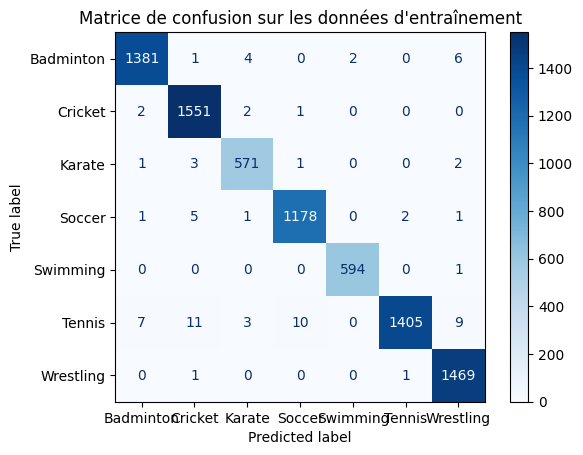

In [29]:
# Affichage de la matrice de confusion avec une taille de figure agrandie
conf_matrix = confusion_matrix(train_generator_for_predictions.classes, train_predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=label_encoder.classes_)

disp.plot(cmap=plt.cm.Blues)

plt.title("Matrice de confusion sur les données d'entraînement")
plt.show()


### **Évaluation finale sur les données d'entraînement**

L'évaluation du modèle sur l'ensemble d'entraînement permet de mesurer sa performance en termes de **perte** (loss) et de **précision** (accuracy). Cette étape est cruciale pour comprendre comment le modèle se comporte sur les données qu'il a utilisées pour s'entraîner.

### **Interprétation des résultats** :
- **Perte (`train_loss`)** : Plus la perte est faible, mieux le modèle a appris à prédire les bonnes classes. Une perte élevée peut indiquer que le modèle a du mal à faire des prédictions correctes.
- **Précision (`train_accuracy`)** : Une précision élevée, proche de 1 (ou 100%), indique que le modèle est capable de prédire correctement une grande majorité des images dans l'ensemble d'entraînement. Cependant, il est important de vérifier si le modèle n'est pas sur-appris (overfitting), ce qui signifie qu'il est trop ajusté aux données d'entraînement et qu'il pourrait ne pas généraliser correctement sur de nouvelles données.

In [30]:
# Évaluation finale sur les données d'entraînement
train_loss, train_accuracy = model.evaluate(train_generator_for_predictions)
print(f"Perte sur l'ensemble d'entraînement : {train_loss}")
print(f"Précision sur l'ensemble d'entraînement : {train_accuracy}")

258/258 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.9891 - loss: 0.0361
Perte sur l'ensemble d'entraînement : 0.035180941224098206
Précision sur l'ensemble d'entraînement : 0.9905190467834473


### **Affichage des Images avec les Labels Prédits**

L'objectif de ce code est de **charger un lot d'images** à partir du générateur d'images, de **générer des prédictions** pour ces images, puis d'afficher un certain nombre d'images avec les **labels prédits** par le modèle.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


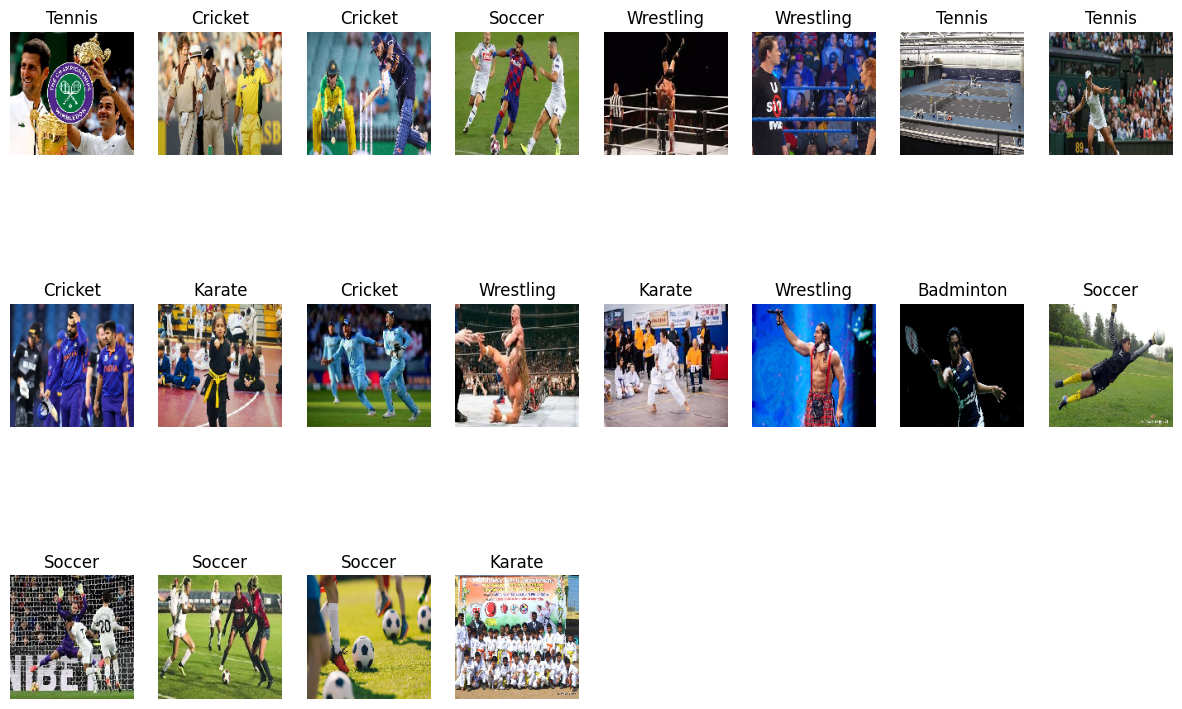

In [35]:
# Charger un lot d'images à partir du générateur
x_batch, _ = next(train_generator)  # Nous n'avons pas besoin des labels ici (donc on ignore la deuxième valeur)

# Générer des prédictions pour ce lot d'images
predictions = model.predict(x_batch)

# Obtenez les indices des classes prédites (avec la probabilité la plus élevée)
predicted_classes = np.argmax(predictions, axis=1)

# Afficher un certain nombre d'images avec leurs labels prédits
num_images_to_show = 20  # Par exemple, afficher 20 images
images_per_row = 8  # Nombre d'images par ligne

# Créer un graphique
plt.figure(figsize=(15, 10))

# Afficher les images et leurs labels prédits
for i in range(num_images_to_show):
    # Convertir np.ceil en entier pour le nombre de lignes
    ax = plt.subplot(int(np.ceil(num_images_to_show / images_per_row)), images_per_row, i + 1)  # Organiser les images en plusieurs lignes
    plt.imshow(x_batch[i])  # Afficher l'image
    plt.title(label_encoder.classes_[predicted_classes[i]])  # Afficher le label prédit
    plt.axis('off')  # Ne pas afficher les axes

plt.show()


### **Conclusion**

Le modèle CNN construit dans ce projet a montré des performances prometteuses, atteignant une **précision de validation proche de 100%** après plusieurs epochs d'entraînement. L'**augmentation des données** a joué un rôle important dans l'amélioration de la généralisation du modèle en simulant des transformations réalistes des images. Les résultats obtenus par la **matrice de confusion** et les **courbes d'apprentissage** ont permis de confirmer que le modèle s'améliorait au fur et à mesure de l'entraînement, tout en évitant le sur-apprentissage grâce à l'utilisation de données augmentées.

En conclusion, les étapes de **prétraitement**, **augmentation des données**, et d'**évaluation des performances** sont essentielles pour construire un modèle robuste de classification d'images. Ces traitements permettent non seulement d'améliorer la précision du modèle, mais aussi de mieux comprendre ses erreurs et de les corriger pour de futures itérations d'entraînement.